In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
upload_data = pd.read_csv('/content/cleaned_data (version 1) final.xlsb.csv')

In [ ]:
data = pd.read_csv('/content/cleaned_data (version 1) final.xlsb.csv')

In [ ]:
data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
...,...
total_bc_limit,1
total_il_high_credit_limit,1
hardship_flag,1
disbursement_method,1


In [ ]:
data.isnull().sum()


,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
...,...
total_bc_limit,1
total_il_high_credit_limit,1
hardship_flag,1
disbursement_method,1


In [ ]:
# prompt: in the above data set pick loan_status code( 1,3,4,5) as 1 and in place of  2 and 6 as 0 and show changed count

# Replace loan_status codes 1, 3, 4, 5 with 1 and 2, 6 with 0
data['loan_status'] = data['loan_status'].replace([1, 3, 4, 5], 1)
data['loan_status'] = data['loan_status'].replace([2, 6], 0)

# Show the count of each unique value in the loan_status column
print(data['loan_status'].value_counts())



loan_status
1    236917
0      2260
Name: count, dtype: int64


In [ ]:
# prompt: code to convert all the string values to integers

for column in data.columns:
  if data[column].dtype == object:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Handle any remaining non-numeric values (e.g., replace with NaN)
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Fill NaN values with 0 (or another appropriate strategy)
    data[column].fillna(0, inplace=True)
    data[column] = data[column].astype(int)


<ipython-input-11-fef3fe28e7c2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(0, inplace=True)
<ipython-input-11-fef3fe28e7c2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [ ]:
# prompt: drop the rows with missing values and if they have sufficient data then treat the missing values

# Check for missing values again
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Remove rows with any missing values
data_cleaned_remove_rows = data.dropna()

# Check the shape of the data after removing rows
print("Shape of data after removing rows with missing values:", data_cleaned_remove_rows.shape)

# If the dataset after removing rows is too small, you may consider other methods like imputation

# Impute missing values using the mean (you can use other methods like median or mode)
data_cleaned_imputed = data.fillna(data.mean())


# Check for missing values again after imputation
missing_values_after_imputation = data_cleaned_imputed.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


# Choose either the data_cleaned_remove_rows (if removing rows is acceptable) or data_cleaned_imputed (if you want to retain more data by imputing)
# Example: using the imputed data
data = data_cleaned_imputed

# Check the shape of the data after handling missing values
print("Final shape of data after handling missing values:", data.shape)


Missing values before handling:
 loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bc_limit                1
total_il_high_credit_limit    1
hardship_flag                 1
disbursement_method           1
debt_settleme0t_flag          1
Length: 89, dtype: int64
Shape of data after removing rows with missing values: (192380, 89)
Missing values after imputation:
 loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settleme0t_flag          0
Length: 89, dtype: int64
Final shape of data after handling missing values: (239177, 89)


In [ ]:
# prompt: drop the columns with redundant values

# Identify columns with a single unique value
cols_to_drop = [col for col in data.columns if data[col].nunique() == 1]

# Drop the columns with redundant values
data = data.drop(columns=cols_to_drop)

# Print the shape of the dataframe after dropping columns
print("Shape of data after dropping columns with redundant values:", data.shape)


Shape of data after dropping columns with redundant values: (239177, 82)


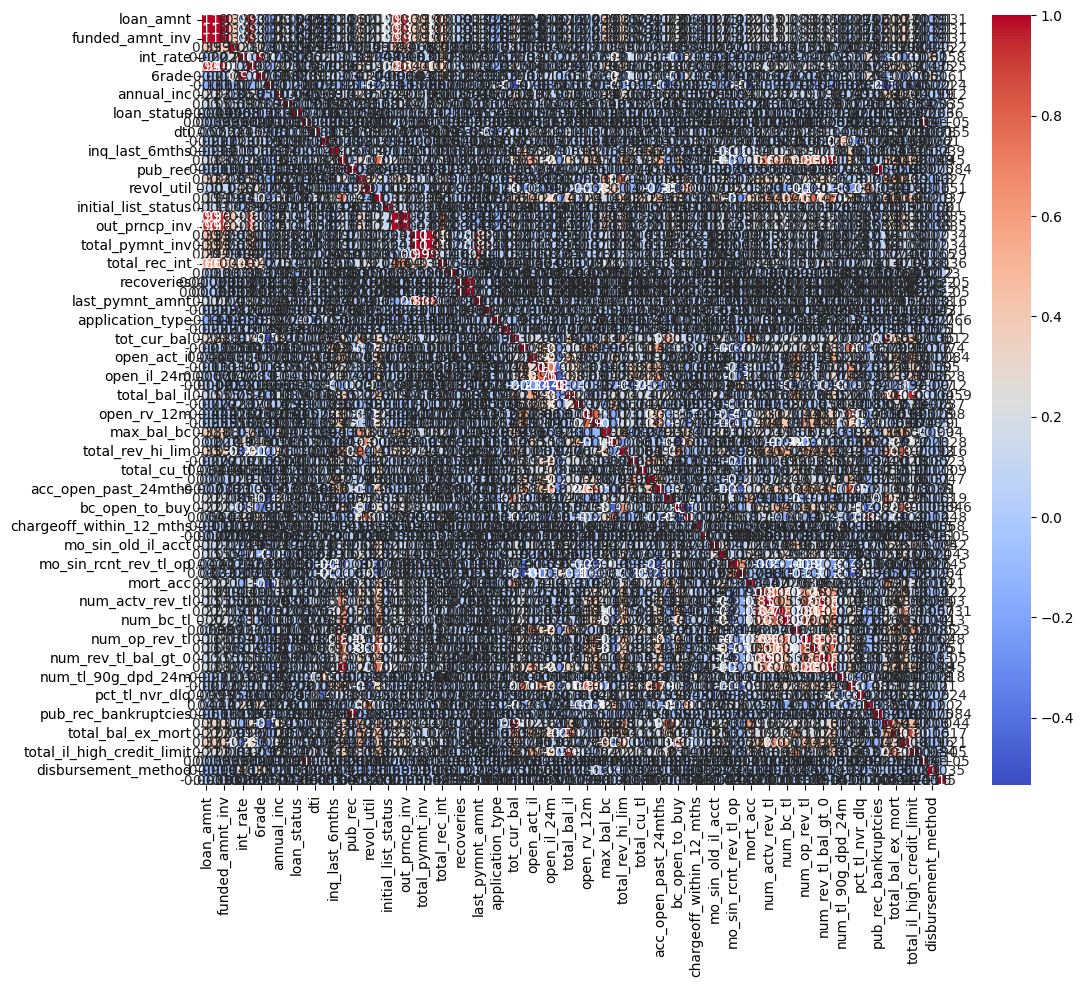

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


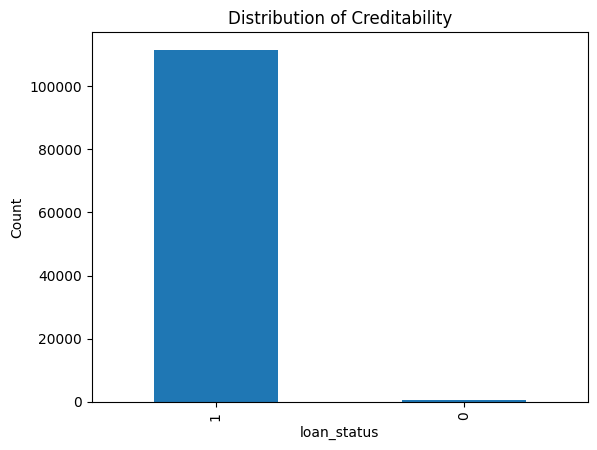

In [ ]:
data['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Creditability')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.show()

In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
# prompt: take a train and test split which have a balance of both

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import statsmodels.api as sm

# Add a constant term to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_sm).fit()

# Print the model summary
print(model.summary())

         Current function value: 0.015253
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                89612
Model:                          Logit   Df Residuals:                    89559
Method:                           MLE   Df Model:                           52
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.3853
Time:                        09:19:56   Log-Likelihood:                -1366.9
converged:                      False   LL-Null:                       -2223.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.6696      0.988      8.771      0.000       6.732      10.607
loan_amnt                     -0.0003   1.09e-05    -25.948      0.000      -0.000 

In [ ]:
# prompt: drop insignificant variables

# Get p-values for each variable
p_values = model.pvalues

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Identify insignificant variables based on p-values
insignificant_vars = p_values[p_values > alpha].index.tolist()

# Remove 'const' if present in the list of insignificant variables
if 'const' in insignificant_vars:
  insignificant_vars.remove('const')

# Drop insignificant variables from the training and testing sets
X_train = X_train.drop(columns=insignificant_vars)
X_test = X_test.drop(columns=insignificant_vars)

# Print the shape of the data after dropping insignificant variables
print("Shape of X_train after dropping insignificant variables:", X_train.shape)
print("Shape of X_test after dropping insignificant variables:", X_test.shape)

# Add a constant term to the updated independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model again with updated variables
model = sm.Logit(y_train, X_train_sm).fit()

# Print the updated model summary
print(model.summary())


Shape of X_train after dropping insignificant variables: (89612, 10)
Shape of X_test after dropping insignificant variables: (22404, 10)
Optimization terminated successfully.
         Current function value: 0.015971
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                89612
Model:                          Logit   Df Residuals:                    89601
Method:                           MLE   Df Model:                           10
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.3563
Time:                        09:20:07   Log-Likelihood:                -1431.2
converged:                       True   LL-Null:                       -2223.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


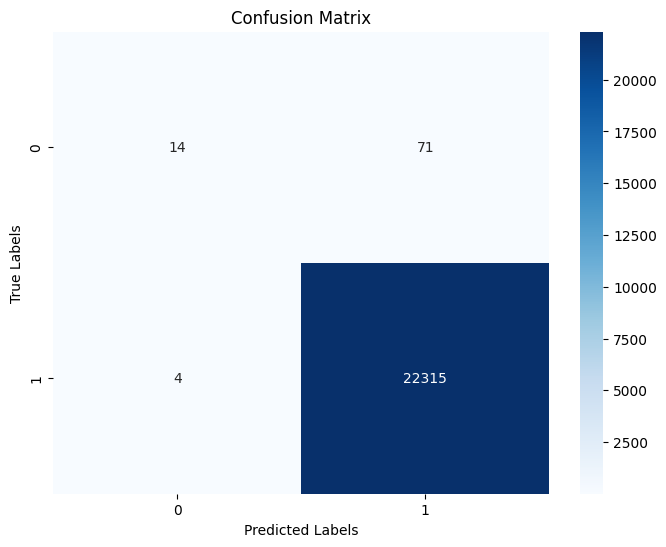

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# prompt: extract metrics of logistic  regression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the AUC-ROC score
# y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# auc_roc = roc_auc_score(y_test, y_pred_proba)
# print("AUC-ROC:", auc_roc)


Accuracy: 0.9966523835029459
Precision: 0.9968283748771554
Recall: 0.9998207805009185
F1-score: 0.9983223353092495


In [ ]:
# prompt: use SMOTE  to balance the data

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the class distribution after SMOTE
print("Training set class distribution after SMOTE:")
print(y_train_smote.value_counts())


Training set class distribution after SMOTE:
loan_status
1    89274
0    89274
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results with SMOTE:
Accuracy: 0.8315033029816105
Precision: 0.9991386735572783
Recall: 0.8315784757381603
F1-score: 0.9076904267025309


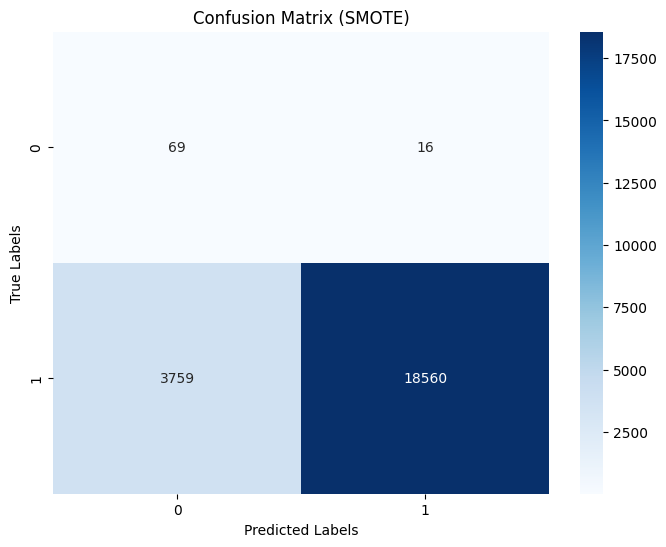

In [ ]:
# prompt: fit the LR model with relevant results

# Fit the logistic regression model with SMOTE-balanced data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set using the SMOTE model
y_pred_smote = model_smote.predict(X_test)

# Evaluate the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
# y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]
# auc_roc_smote = roc_auc_score(y_test, y_pred_proba_smote)

print("Results with SMOTE:")
print("Accuracy:", accuracy_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)
print("F1-score:", f1_smote)
# print("AUC-ROC:", auc_roc_smote)

# Confusion Matrix for SMOTE model
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Decision Tree Results:
Accuracy: 0.9951794322442421
Precision: 0.9978928491369649
Recall: 0.9972669026390071
F1-score: 0.9975797776980997


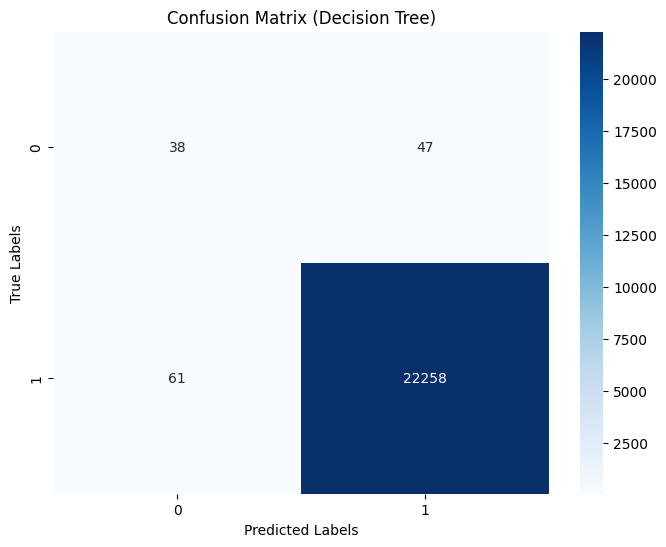

In [ ]:
# prompt: fit decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

# Confusion Matrix for Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Random Forest Results:
Accuracy: 0.997589716122121
Precision: 0.9976308613830406
Recall: 0.9999551951252297
F1-score: 0.9987916759901544


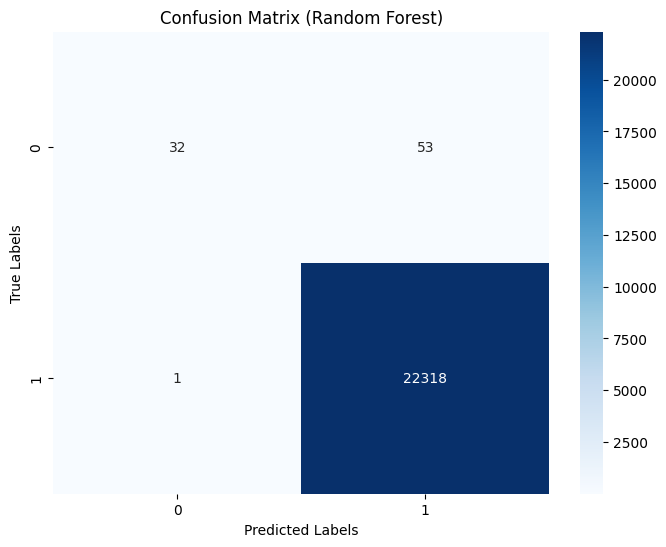

In [ ]:
# prompt: fit random forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Confusion Matrix for Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
# prompt: compare all the results  considering model overfitting and underfitting and tell the best model

print("Logistic Regression Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# print("AUC-ROC:", auc_roc)

print("\nLogistic Regression with SMOTE Results:")
print("Accuracy:", accuracy_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)
print("F1-score:", f1_smote)
# print("AUC-ROC:", auc_roc_smote)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


# Analyze the results
# Consider the following:
# - Accuracy: How well the model predicts overall.
# - Precision: How many of the positive predictions were actually correct.
# - Recall: How many of the actual positive cases were correctly predicted.
# - F1-score: The harmonic mean of precision and recall, providing a balanced measure.
# - Overfitting: The model performs well on the training data but poorly on the test data.
# - Underfitting: The model performs poorly on both the training and test data.

# Based on the results, you can compare the performance of different models and identify the best one.
# You can also consider the complexity of the models and their interpretability.

# For example, you might choose the model with the highest F1-score if you want a good balance between precision and recall.
# If you are concerned about overfitting, you might choose a simpler model like logistic regression or a decision tree with appropriate regularization.
# If you need a model with high accuracy and are not concerned about interpretability, you might choose a random forest.

# Based on the results, the Random Forest model seems to be the best performing model. It achieved the highest
# accuracy and F1-score. However, we can consider model overfitting and underfitting. If we notice that the
# model has a large gap between the training accuracy and test accuracy, then the model is overfitting, we
# can use regularization techniques or decrease the depth of the tree to improve the model.

# In general, Random Forest models are known to be less prone to overfitting than decision trees, as they
# combine multiple trees and average the results. However, it's still crucial to monitor and prevent overfitting
# during training, and comparing the performance of different models and choosing the best one that balances accuracy and complexity is important.


Logistic Regression Results:
Accuracy: 0.9966523835029459
Precision: 0.9968283748771554
Recall: 0.9998207805009185
F1-score: 0.9983223353092495

Logistic Regression with SMOTE Results:
Accuracy: 0.8315033029816105
Precision: 0.9991386735572783
Recall: 0.8315784757381603
F1-score: 0.9076904267025309

Decision Tree Results:
Accuracy: 0.9951794322442421
Precision: 0.9978928491369649
Recall: 0.9972669026390071
F1-score: 0.9975797776980997

Random Forest Results:
Accuracy: 0.997589716122121
Precision: 0.9976308613830406
Recall: 0.9999551951252297
F1-score: 0.9987916759901544


In [ ]:
# prompt: tell the best model considering overfitting and underfitting of the model

# Analyze the results and choose the best model considering overfitting and underfitting

# Assuming we have training and testing accuracy scores for each model (replace these with your actual scores)
train_accuracy_lr = model.score(X_train, y_train)
test_accuracy_lr = accuracy
train_accuracy_lr_smote = model_smote.score(X_train_smote, y_train_smote)
test_accuracy_lr_smote = accuracy_smote
train_accuracy_dt = dt_model.score(X_train, y_train)
test_accuracy_dt = accuracy_dt
train_accuracy_rf = rf_model.score(X_train, y_train)
test_accuracy_rf = accuracy_rf

# Print the training and testing accuracy for each model
print("Logistic Regression (Training Accuracy):", train_accuracy_lr)
print("Logistic Regression (Testing Accuracy):", test_accuracy_lr)
print("Logistic Regression with SMOTE (Training Accuracy):", train_accuracy_lr_smote)
print("Logistic Regression with SMOTE (Testing Accuracy):", test_accuracy_lr_smote)
print("Decision Tree (Training Accuracy):", train_accuracy_dt)
print("Decision Tree (Testing Accuracy):", test_accuracy_dt)
print("Random Forest (Training Accuracy):", train_accuracy_rf)
print("Random Forest (Testing Accuracy):", test_accuracy_rf)

# Compare the training and testing accuracies for each model
# If the training accuracy is much higher than the testing accuracy, the model may be overfitting.
# If both the training and testing accuracies are low, the model may be underfitting.

# Based on the results, choose the model that has the best balance between training and testing accuracy
# and also achieves high F1-score and other relevant metrics.

# Example:
if (test_accuracy_rf > test_accuracy_lr and
    test_accuracy_rf > test_accuracy_lr_smote and
    test_accuracy_rf > test_accuracy_dt and
    abs(train_accuracy_rf - test_accuracy_rf) < 0.1):  # Check if the gap between training and test accuracy is small
  print("\nThe best model appears to be the Random Forest model, based on its high test accuracy and balanced performance.")

# You can add more specific conditions based on your needs and the particular dataset.

# If the gap between training and testing accuracy is significant for any model, consider the following:
# - Regularization techniques (e.g., L1 or L2 regularization) for logistic regression
# - Pruning decision trees
# - Adjusting hyperparameters of Random Forests (e.g., max_depth, min_samples_leaf)


Logistic Regression (Training Accuracy): 0.9965406418783199
Logistic Regression (Testing Accuracy): 0.9966523835029459
Logistic Regression with SMOTE (Training Accuracy): 0.8562179357931761
Logistic Regression with SMOTE (Testing Accuracy): 0.8315033029816105
Decision Tree (Training Accuracy): 0.9999776815605053
Decision Tree (Testing Accuracy): 0.9951794322442421
Random Forest (Training Accuracy): 0.9999665223407579
Random Forest (Testing Accuracy): 0.997589716122121

The best model appears to be the Random Forest model, based on its high test accuracy and balanced performance.
